Epoch 1/6
844/844 [==============================] - 55s 64ms/step - loss: 0.2239 - accuracy: 0.9305 - val_loss: 0.0366 - val_accuracy: 0.9898
Epoch 2/6
844/844 [==============================] - 53s 63ms/step - loss: 0.0759 - accuracy: 0.9777 - val_loss: 0.0322 - val_accuracy: 0.9908
Epoch 3/6
844/844 [==============================] - 54s 64ms/step - loss: 0.0598 - accuracy: 0.9821 - val_loss: 0.0306 - val_accuracy: 0.9902
Epoch 4/6
844/844 [==============================] - 71s 84ms/step - loss: 0.0474 - accuracy: 0.9856 - val_loss: 0.0296 - val_accuracy: 0.9913
Epoch 5/6
844/844 [==============================] - 66s 78ms/step - loss: 0.0392 - accuracy: 0.9879 - val_loss: 0.0256 - val_accuracy: 0.9925
Epoch 6/6
313/313 [==============================] - 4s 14ms/step - loss: 0.0223 - accuracy: 0.9928
Test Accuracy: 0.9927999973297119
313/313 [==============================] - 5s 15ms/step


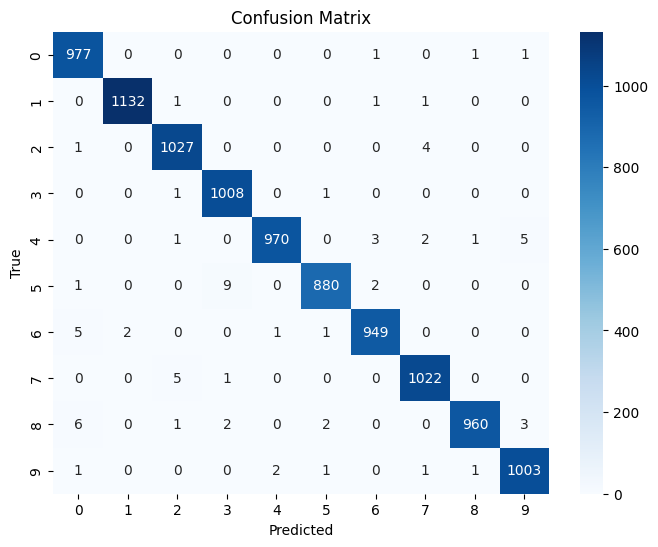

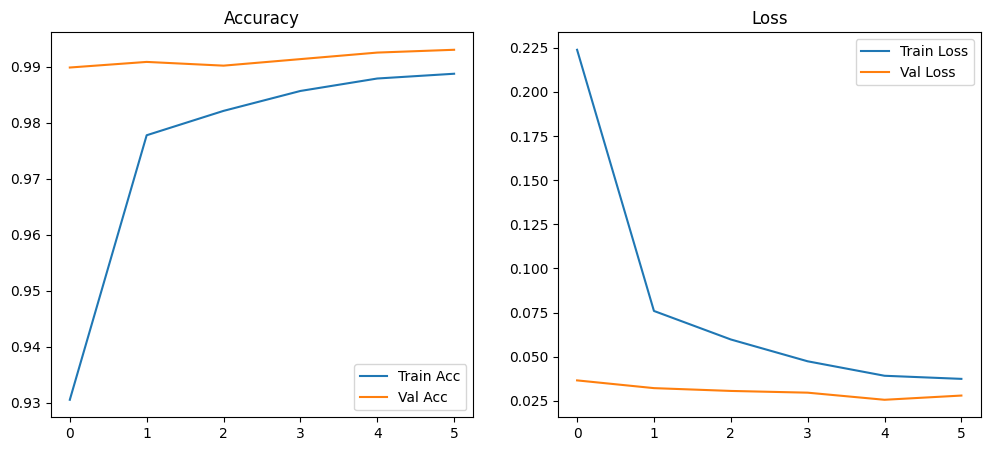

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Dropout(0.25),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=6, batch_size=64, validation_split=0.1)

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

preds = model.predict(X_test)
y_pred = np.argmax(preds, axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(history.history['accuracy'], label='Train Acc')
ax1.plot(history.history['val_accuracy'], label='Val Acc')
ax1.set_title('Accuracy')
ax1.legend()

ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Val Loss')
ax2.set_title('Loss')
ax2.legend()
plt.show()
